## Mahmoud Emara 

### Mini Jupyter Exercise #3

### Gradient Descent
##### Consider the bivariate function $f : \mathbb{R}^2 → \mathbb{R}$ that is defined as follows: $$f(w) = (w^2_1 + w_2 -11)^2 + (w_1 + w^2_2 - 7)^2$$



In [1]:
import numpy as num
from numpy import linalg
from sympy import *

w1 = Symbol('w1')
w2 = Symbol('w2')
# Solving for the partial derivatives of both variables.
f_w = (w1**2 + w2 -11)**2 + (w1 + w2**2 - 7)**2

diffw1 = f_w.diff(w1)
print("Partial Derivative w/ w1 :",diffw1)
diffw2 = f_w.diff(w2)
print("Partial Derivative w/ w2 :",diffw2)
print()
gradient = num.array([diffw1, diffw2])
print("Gradient: ",gradient)

# Below is the solved partial derivatives with respect to each varibale and the
# gradient function as a whole. We see that the gradient is a 2x1 shape.

Partial Derivative w/ w1 : 4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14
Partial Derivative w/ w2 : 2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22

Gradient:  [4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14
 2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22]


##### Your implementation should declare that it has found a minimum $w^*$ if (and when) $||∇f(w^∗)||_2$ falls below $10^{-12}$. Your implementation should declare failure if it cannot find $w^∗$ within 10,000 iterations

Minimum found:  7.646338603546684e-13  at iteration  93
Iteration #: 93
Convergence point:  -3.779310253377743 ,  -3.2831859912861634



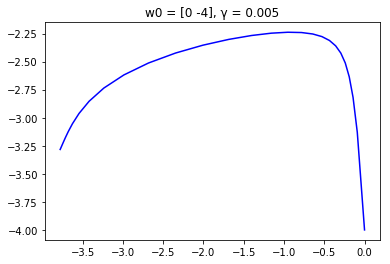

In [13]:
# Steepest Descent -> w_k+1 = w_k-γ∇F(w_k) where w_k+1 is the next step, w_k is
# the current step and γ is a variating size.
import matplotlib.pyplot as plot

w0 = num.array([0,-4]) # Initialize the base value as [0 -4]
x = w0[0] #w1
y = w0[1] #w2
gamma1 = 0.005
error = 1/1000000000000
i = 0

def Gradient(w1,w2):
    gradImp1 = (4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14) 
    gradImp2 = (2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22)
    gradArray = num.array([gradImp1, gradImp2])
    return gradArray
# Here I defined the gradient as a function to be called later. I decided to 
# have it return a vector of the two results it computes with the parameters
# w1 and w2 being the first and second elements in the wth vector.

errorList1 = list()
# The following lists are used for graphic purposes.
xdata1 = list() 
ydata1 = list()
xdata1.append(x)
ydata1.append(y)

# Looping at γ = 0.005
while i<10000:      
    calc1 = x - gamma1*Gradient(x,y) # Gradient descent on the first parameter
    calc2 = y - gamma1*Gradient(x,y) # Gradient descent on the second
    
    minimum = num.linalg.norm(Gradient(calc1,calc2),ord=2)
    errorList1.append(minimum)
    # This error list was used for my own research to see how all of the 
    # minimum values behaved as the loop iterated.
    if (minimum < error):
        print("Minimum found: ",minimum," at iteration ",i)
        print('Iteration #:',i)
        print("Convergence point: ",calc1[0],", ",calc2[1])
        print()
        break
    
    if(i == 10000):
        print("Exceeded number of iterations")
        break
    
    xdata1.append(calc1[0])
    ydata1.append(calc2[1])
        
    x = calc1[0] # Reinitialize the parameters for the next computation.
    y = calc2[1]   
    i = i+1
        
fig = plot.figure()
ax = plot.gca()
ax.plot(xdata1, ydata1, color='blue')
ax.set_title('w0 = [0 -4], γ = 0.005')
plot.show()

Minimum found:  5.682105258659115e-13  at iteration  37
Iteration #: 37
Convergence point:  -3.7793102533777447 ,  -3.283185991286164



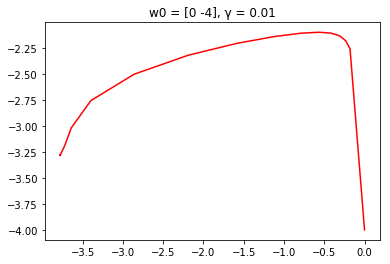

In [3]:
# Running algorithm with γ = 0.01
# The same logic as the previous code is used, however, new lists and variables
# are introduced o preserve the latter for future computations and graphs.
import matplotlib.pyplot as plot

w0 = num.array([0,-4])
x = w0[0] #w1
y = w0[1] #w2
gamma2 = 0.01 # The main difference of this section.
error = 1/1000000000000
i = 0

def Gradient(w1,w2):
    gradImp1 = (4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14) 
    gradImp2 = (2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22)
    gradArray = num.array([gradImp1, gradImp2])
    return gradArray

errorList2 = list()
xdata2 = list()
ydata2 = list()
xdata2.append(x)
ydata2.append(y)

# Looping at γ = 0.005
while i<10000:      
    calc3 = x - gamma2*Gradient(x,y)
    calc4 = y - gamma2*Gradient(x,y)
    
    minimum = num.linalg.norm(Gradient(calc3, calc4),ord=2)
    errorList2.append(minimum)
    if (minimum < error):
        print("Minimum found: ",minimum," at iteration ",i)
        print('Iteration #:',i)
        print("Convergence point: ",calc3[0],", ",calc4[1])
        print()
        break
    
    if(i == 10000):
        print("Exceeded number of iterations")
        break
    
    xdata2.append(calc3[0])
    ydata2.append(calc4[1])
        
    x = calc3[0]
    y = calc4[1]   
    i = i+1
        
fig = plot.figure()
ax = plot.gca()
ax.plot(xdata2, ydata2, color='red')
ax.set_title('w0 = [0 -4], γ = 0.01')
plot.show()

##### Run gradient descent with step size γ = 0.01 for four different initializations: (i) $w^0 = [0\;\;-4]^T$ (ii) $w^0 = [0.5\;\;-4]^T$ (iii) $w^0 = [0\;\;4]^T$ (iv) $w^0 = [0.5\;\;4]^T$

Code for (i) has been implemented above.

Minimum found:  8.583001043200452e-13  at iteration  92
Iteration #: 92
Convergence point:  3.5844283403304904 ,  -1.848126526964389



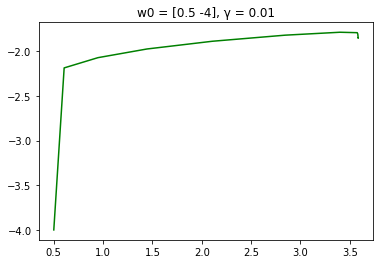

In [4]:
# This is the code for w0 = [0.5 -4]
import matplotlib.pyplot as plot

w0 = num.array([0.5,-4])
x = w0[0] #w1
y = w0[1] #w2
gamma2 = 0.01
error = 1/1000000000000
i = 0

def Gradient(w1,w2):
    gradImp1 = (4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14) 
    gradImp2 = (2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22)
    gradArray = num.array([gradImp1, gradImp2])
    return gradArray

errorList3 = list()
xdata3 = list()
ydata3 = list()
xdata3.append(x)
ydata3.append(y)

# Looping at γ = 0.005
while i<10000:      
    calc5 = x - gamma2*Gradient(x,y)
    calc6 = y - gamma2*Gradient(x,y)
    
    minimum = num.linalg.norm(Gradient(calc5, calc6),ord=2)
    errorList3.append(minimum)
    if (minimum < error):
        print("Minimum found: ",minimum," at iteration ",i)
        print('Iteration #:',i)
        print("Convergence point: ",calc5[0],", ",calc6[1])
        print()
        break
    
    if(i == 10000):
        print("Exceeded number of iterations")
        break
    
    xdata3.append(calc5[0])
    ydata3.append(calc6[1])
        
    x = calc5[0]
    y = calc6[1]   
    i = i+1
        
fig = plot.figure()
ax = plot.gca()
ax.plot(xdata3, ydata3, color='green')
ax.set_title('w0 = [0.5 -4], γ = 0.01')
plot.show()

Minimum found:  4.0295201743910237e-13  at iteration  42
Iteration #: 42
Convergence point:  -2.805118086952743 ,  3.131312518250573



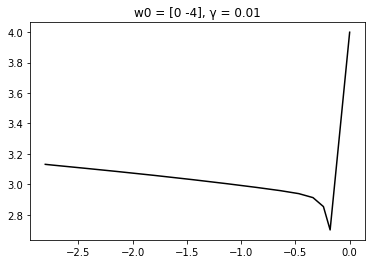

In [5]:
# This is the code for w0 = [0 4]
import matplotlib.pyplot as plot

w0 = num.array([0,4])
x = w0[0] #w1
y = w0[1] #w2
gamma2 = 0.01
error = 1/1000000000000
i = 0

def Gradient(w1,w2):
    gradImp1 = (4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14) 
    gradImp2 = (2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22)
    gradArray = num.array([gradImp1, gradImp2])
    return gradArray

errorList4 = list()
xdata4 = list()
ydata4 = list()
xdata4.append(x)
ydata4.append(y)

# Looping at γ = 0.01
while i<10000:      
    calc7 = x - gamma2*Gradient(x,y)
    calc8 = y - gamma2*Gradient(x,y)
    
    minimum = num.linalg.norm(Gradient(calc7, calc8),ord=2)
    errorList4.append(minimum)
    if (minimum < error):
        print("Minimum found: ",minimum," at iteration ",i)
        print('Iteration #:',i)
        print("Convergence point: ",calc7[0],", ",calc8[1])
        print()
        break
    
    if(i == 10000):
        print("Exceeded number of iterations")
        break
    
    xdata4.append(calc7[0])
    ydata4.append(calc8[1])
        
    x = calc7[0]
    y = calc8[1]   
    i = i+1
        
fig = plot.figure()
ax = plot.gca()
ax.plot(xdata4, ydata4, color='black')
ax.set_title('w0 = [0 -4], γ = 0.01')
plot.show()

Minimum found:  8.921068071731789e-13  at iteration  112
Iteration #: 112
Convergence point:  2.9999999999999933 ,  2.0000000000000164



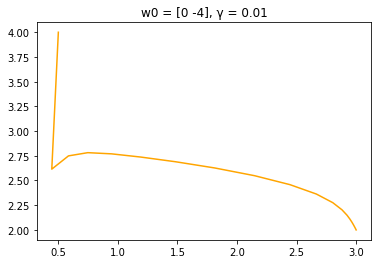

In [6]:
# This is the code for w0 = [0.5 4]
import matplotlib.pyplot as plot

w0 = num.array([0.5,4])
x = w0[0] #w1
y = w0[1] #w2
gamma2 = 0.01
error = 1/1000000000000
i = 0

def Gradient(w1,w2):
    gradImp1 = (4*w1*(w1**2 + w2 - 11) + 2*w1 + 2*w2**2 - 14) 
    gradImp2 = (2*w1**2 + 4*w2*(w1 + w2**2 - 7) + 2*w2 - 22)
    gradArray = num.array([gradImp1, gradImp2])
    return gradArray

errorList5 = list()
xdata5 = list()
ydata5 = list()
xdata5.append(x)
ydata5.append(y)

# Looping at γ = 0.01
while i<10000:      
    calc9 = x - gamma2*Gradient(x,y)
    calc0 = y - gamma2*Gradient(x,y)
    
    minimum = num.linalg.norm(Gradient(calc9, calc0),ord=2)
    errorList5.append(minimum)
    if (minimum < error):
        print("Minimum found: ",minimum," at iteration ",i)
        print('Iteration #:',i)
        print("Convergence point: ",calc9[0],", ",calc0[1])
        print()
        break
    
    if(i == 10000):
        print("Exceeded number of iterations")
        break
    
    xdata5.append(calc9[0])
    ydata5.append(calc0[1])
        
    x = calc9[0]
    y = calc0[1]   
    i = i+1
        
fig = plot.figure()
ax = plot.gca()
ax.plot(xdata5, ydata5, color='orange')
ax.set_title('w0 = [0 -4], γ = 0.01')
plot.show()

Only two initializations are the same: $w^0 = [0\;\;-4]^T$ and $w^0 = [0\;\;4]^T$

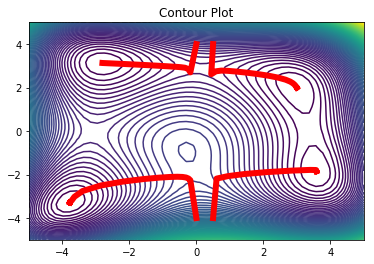

In [7]:
# Graphing the contour plot with the data points of the four previous 
# initializations. 
import matplotlib.pyplot as plt
w1space = num.linspace(-5.0,5.0) 
w2space = num.linspace(-5.0,5.0)

w_1, w_2 = num.meshgrid(w1space,w2space)
f_w = (w_1**2 + w_2 -11)**2 + (w_1 + w_2**2 - 7)**2

plt.figure()
plt.contour(w_1,w_2,f_w,100)
plt.plot(xdata2, ydata2, color='red',linewidth=6.0)
plt.plot(xdata3, ydata3, color='red',linewidth=6.0)
plt.plot(xdata4, ydata4, color='red',linewidth=6.0)
plt.plot(xdata5, ydata5, color='red',linewidth=6.0)
plt.title('Contour Plot')
plt.show()


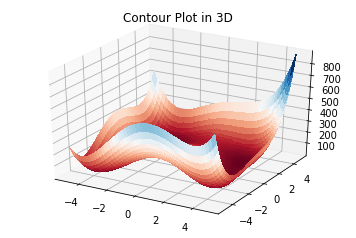

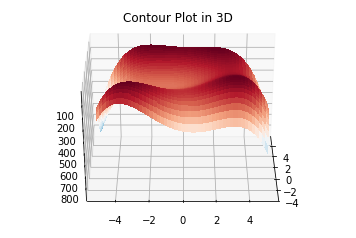

In [8]:
# Here I show a 3-Dimensional representaion of the contour and where the 4 
# local minima are located.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

def z_func(x,y):
    return (x**2 + y -11)**2 + (x + y**2 - 7)**2
Z = z_func(w_1,w_2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Contour Plot in 3D')
surf = ax.plot_surface(w_1, w_2, Z, rstride=1, cstride=1,cmap=cm.RdBu,linewidth=0, antialiased=False)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('Contour Plot in 3D')
surf = ax.plot_surface(w_1, w_2, Z, rstride=1, cstride=1,cmap=cm.RdBu,linewidth=0, antialiased=False)
for angle in range(0, 360):
    ax.view_init(210, angle)
    #plt.draw()
    plt.pause(.001)
plt.show()

### Parameter Estimation
##### 1. Use the scipy.stats.multivariate_normal module within the scipy package to generate N realizationsof a Gaussian random vector $X ∈ \mathbb{R}^5$ with mean vector µ = $\mathbb{E}[X] = [−1\;0\;4\;1\;0.5]^T$ andcovariance matrix $C = 2I$, where $I ∈ \mathbb{R}^{5x5}$ denote the identity matrix. 

In [10]:
from scipy.stats import multivariate_normal
import math

mu = [-1,0,4,1,0.5] # µ = E[X]
I = num.identity(5) # Initialize the identity matrix
C = 2*I
mvnorm = multivariate_normal(mu,C)

# N: N = 10^j where j = 1,...,6 and estimte the mean vector.
def meanEstimate(N):
    valVector = mvnorm.rvs(math.ceil(N//5)) # N / M
    return (1/N)*sum(valVector.flatten())

meanEst1 = meanEstimate(10)
print("The estimate for N =",10,"=",meanEst1)

meanEst2 = meanEstimate(100)
print("The estimate for N =",100,"=",meanEst2)

meanEst3 = meanEstimate(1000)
print("The estimate for N =",1000,"=",meanEst3)

meanEst4 = meanEstimate(10000)
print("The estimate for N =",10000,"=",meanEst4)

meanEst5 = meanEstimate(100000)
print("The estimate for N =",100000,"=",meanEst5)

meanEst6 = meanEstimate(1000000)
print("The estimate for N =",1000000,"=",meanEst6)

The estimate for N = 10 = 0.6422280867508504
The estimate for N = 100 = 0.6809784925236891
The estimate for N = 1000 = 0.8707559938074547
The estimate for N = 10000 = 0.8948865674568184
The estimate for N = 100000 = 0.8992961748212354
The estimate for N = 1000000 = 0.9015788607309969


In [11]:
# Compute the instantaneous error between the mean estimation and actal mean.

def instantError(N):
    error = meanEstimate(N) - mu
    temp = linalg.norm(error,2)
    return temp**2

instError1 = instantError(10)
print("The instantaneous error for N =",10,"=",instError1)

instError2 = instantError(100)
print("The instantaneous error for N =",100,"=",instError2)

instError3 = instantError(1000)
print("The instantaneous error for N =",1000,"=",instError3)

instError4 = instantError(10000)
print("The instantaneous error for N =",10000,"=",instError4)

instError5 = instantError(100000)
print("The instantaneous error for N =",100000,"=",instError5)

instError6 = instantError(1000000)
print("The instantaneous error for N =",1000000,"=",instError6)


The instantaneous error for N = 10 = 16.87148859214125
The instantaneous error for N = 100 = 14.217402680691475
The instantaneous error for N = 1000 = 14.226308443591401
The instantaneous error for N = 10000 = 14.200023871742305
The instantaneous error for N = 100000 = 14.200489990108073
The instantaneous error for N = 1000000 = 14.200120374319436


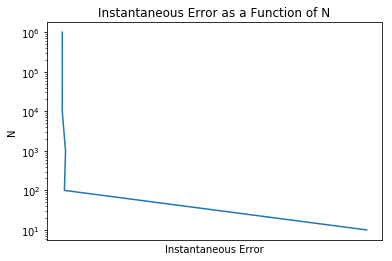

In [12]:
# Provide a log-log plot of the error and N
import matplotlib.pyplot as plt
errorVec = [instError1,instError2,instError3,instError4,instError5,instError6]
NVec = [10,100,1000,10000,100000,1000000]
plt.loglog(errorVec,NVec)
plt.title('Instantaneous Error as a Function of N')
plt.xlabel('Instantaneous Error')
plt.ylabel('N')
plt.show()